In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from utils import run_test, run_search_test, plot_search, jsonsave

Let's first define the base model
---

In [2]:
def get_mlp(features):
    model = tf.keras.models.Sequential([
        layers.Dense(features, activation="relu"),
        layers.Dropout(.1),
        layers.Dense(features//2, activation="relu"),
        layers.Dropout(.1),
        layers.Dense(features//4, activation="relu"),
        layers.Dropout(.1),
        layers.Dense(1, activation="linear"),
    ])

    model.compile(
        optimizer = tf.keras.optimizers.Adam(lr=.001),
        loss = "mse"
    )
    return model

Let's just try a run
---

In [ ]:
run_test(lambda :get_mlp(32), fit_kwargs=dict(epochs=5, verbose=0), verbose=True)

In [26]:
class search_model:
    def __init__(self, features):
        self.features = features
    def __call__(self):
        return get_mlp(self.features)

search_dict = run_search_test(search_model, "features", [8, 16, 32, 64, 128, 256, 512, 1024], fit_kwargs=dict(epochs=50, batch_size=256, verbose=0), seed=42, save_json=True, verbose=True)

jsonsave(search_dict, "MLP_neurons_per_layer.json")

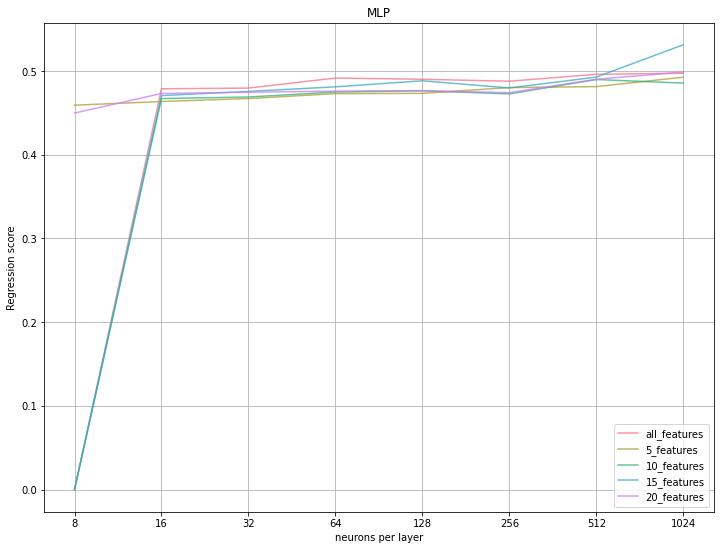

In [1]:
import json
from os.path import join
from utils import plot_search, JSON_PATH

search_dict = json.load(open(join(JSON_PATH, "MLP_neurons_per_layer.json"), 'r'))

plot_search("MLP", "neurons per layer", search_dict, save_png=True, save_tex=True)
